# To predict diabetes using PIMA diabetes data

### Importing libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
data = pd.read_csv("pima-data.csv")

In [3]:
data.shape

(768, 10)

In [4]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

In [7]:
data.describe(include='all')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,NaN


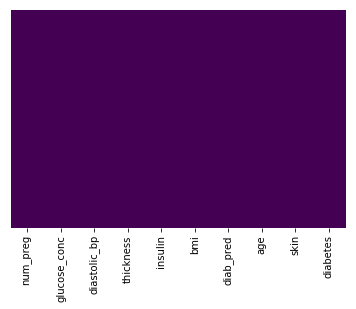

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

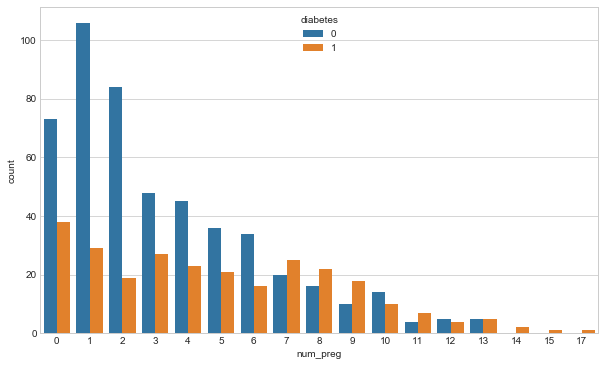

In [18]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='num_preg',hue='diabetes',data=data)

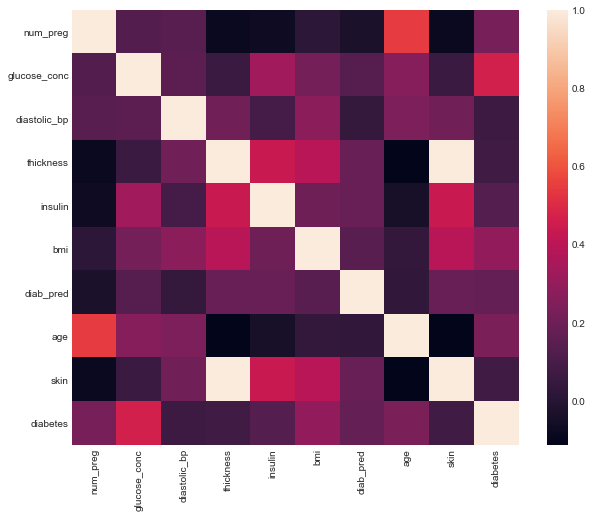

In [24]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr)

## Changing the diabetes column data from boolean to number

In [10]:
diabetes_map = {True: 1, False: 0}

In [11]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [25]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


#### Scaling the data using StandardScaler

In [26]:
numeric_Attributes = data.select_dtypes(include=['int64','float64']).columns
numeric_Attributes

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [27]:
standardScaler = StandardScaler()
columns_to_scale = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [28]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0.907270,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.530902,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,-1.288212,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.154533,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0.907270,1


In [29]:
y=data['diabetes']
X=data.drop(['diabetes'],axis=1)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

### Multiple Models

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [34]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', xgboost.XGBClassifier()))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [36]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.779221
1  SVC  0.757576
2   LR  0.779221
3   DT  0.753247
4  GNB  0.766234
5   RF  0.770563
6  XGB  0.774892


## Logistic Regression

In [74]:
param={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}   #L1=Lasso  L2 = Ridge

LR=LogisticRegression()
LR_cv=GridSearchCV(LR,param,cv=5)


LR_cv.fit(X_train,y_train)

print("Best parameters for LR",LR_cv.best_params_)
print("Accuracy:",LR_cv.best_score_)

Best parameters for LR {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.7746741154562383


#### After tuning parameters

In [75]:
LR2=LogisticRegression(C=0.1,penalty="l1")
LR2.fit(X_train,y_train)
print("Accuracy",LR2.score(X_test,y_test))

Accuracy 0.7619047619047619


In [40]:
# Predictions on train data
LR_train=LR2.predict(X_train)

# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,LR_train))

# Predictions on test data
LR_test=LR2.predict(X_test)

# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,LR_test))

confusion_matrix on train data
 [[297  46]
 [ 81 113]]
confusion_matrix on test data
 [[141  16]
 [ 35  39]]


In [41]:
print("\nClassification Report on Train Data\n",classification_report(y_train,LR_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,LR_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

           0       0.79      0.87      0.82       343
           1       0.71      0.58      0.64       194

    accuracy                           0.76       537
   macro avg       0.75      0.72      0.73       537
weighted avg       0.76      0.76      0.76       537


Classification Report on Test Data
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



## Random Forest 

In [43]:
rf = RandomForestClassifier()

In [44]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [45]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [47]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [48]:
rf_pred=grid_search.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, rf_pred)))

Accuracy = 0.758


In [49]:
# Predictions on train data
rf_train=grid_search.predict(X_train)

# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,rf_train))

# Predictions on test data
rf_test=grid_search.predict(X_test)

# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,rf_test))

confusion_matrix on train data
 [[325  18]
 [ 45 149]]
confusion_matrix on test data
 [[140  17]
 [ 39  35]]


In [50]:
print("\nClassification Report on Train Data\n",classification_report(y_train,rf_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,rf_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       343
           1       0.89      0.77      0.83       194

    accuracy                           0.88       537
   macro avg       0.89      0.86      0.87       537
weighted avg       0.88      0.88      0.88       537


Classification Report on Test Data
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.67      0.47      0.56        74

    accuracy                           0.76       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.75      0.76      0.74       231



## XGBoost

In [59]:
import xgboost
XGB=xgboost.XGBClassifier()

In [60]:
estimator = xgboost.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [62]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [63]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

In [64]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   15.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   32.9s
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:   36.8s finished
C:\Users\Sharo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},


In [65]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [66]:
xg_pred=grid_search.predict(X_test)

In [67]:
from sklearn import metrics

print("XGBoost Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, xg_pred)))

XGBoost Accuracy = 0.758


In [68]:
# Predictions on train data
xgb_train=grid_search.predict(X_train)

# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,xgb_train))

# Predictions on test data
xgb_test=grid_search.predict(X_test)

# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,xgb_test))

confusion_matrix on train data
 [[312  31]
 [ 59 135]]
confusion_matrix on test data
 [[137  20]
 [ 36  38]]


In [69]:
print("\nClassification Report on Train Data\n",classification_report(y_train,xgb_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,xgb_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       343
           1       0.81      0.70      0.75       194

    accuracy                           0.83       537
   macro avg       0.83      0.80      0.81       537
weighted avg       0.83      0.83      0.83       537


Classification Report on Test Data
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.66      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



## Storing and Loading model from .pkl file

#### Since  LogisticRegression has highest accuracy of 0.774, hence it is choosen as best model. Model is stored and loaded from .pkl file

In [87]:
from sklearn.externals import joblib 

In [88]:
# Save the model as a pickle in a file 
joblib.dump(LR_cv, 'diabetes.pkl') 

['diabetes.pkl']

In [89]:
# Load the model from the file 
lr_from_joblib = joblib.load('diabetes.pkl')   

In [90]:
# Use the loaded model to make predictions 
lr_from_joblib.fit(X_train,y_train)
lr_test=lr_from_joblib.predict(X_test)

In [91]:
lr_train=lr_from_joblib.predict(X_train)

In [92]:
from sklearn import metrics

print("LR Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, lr_test)))

LR Accuracy = 0.762


In [93]:


# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,xgb_train))



# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,xgb_test))

confusion_matrix on train data
 [[312  31]
 [ 59 135]]
confusion_matrix on test data
 [[137  20]
 [ 36  38]]


In [94]:


# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,xgb_train))



# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,xgb_test))

confusion_matrix on train data
 [[312  31]
 [ 59 135]]
confusion_matrix on test data
 [[137  20]
 [ 36  38]]
